In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# Load Data
data=pd.read_csv('Solar.csv')
data.head()

,name,id,address,date,kWh,public_url,installationDate,uid
0,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 08:00:00 AM,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 08:00:00
1,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 09:00:00 AM,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 09:00:00
2,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 10:00:00 AM,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 10:00:00
3,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 11:00:00 AM,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 11:00:00
4,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 12:00:00 PM,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 12:00:00


In [2]:
# Show frequency of various locations
print(data['name'].value_counts())
print()
locations=list(data['name'].value_counts().index)
print(locations)

Southland Leisure Centre                     31590
Whitehorn Multi-Service Centre               27716
City of Calgary North Corporate Warehouse    27092
Richmond - Knob Hill Community Hall          26623
Glenmore Water Treatment Plant               25920
Calgary Fire Hall Headquarters               25637
Bearspaw Water Treatment Plant               24869
Hillhurst Sunnyside Community Association    23467
CFD Firehall #7                              22659
Manchester Building M                        22533
Telus Spark                                    317
Name: name, dtype: int64

['Southland Leisure Centre', 'Whitehorn Multi-Service Centre', 'City of Calgary North Corporate Warehouse', 'Richmond - Knob Hill Community Hall', 'Glenmore Water Treatment Plant', 'Calgary Fire Hall Headquarters', 'Bearspaw Water Treatment Plant', 'Hillhurst Sunnyside Community Association', 'CFD Firehall #7', 'Manchester Building M', 'Telus Spark']


date
2016-01-31     3081.863
2016-02-29     9544.109
2016-03-31    18105.476
2016-04-30    21241.109
2016-05-31    22154.348
Name: kWh, dtype: float64
date
2020-08-31    25900.142
2020-09-30    17154.487
2020-10-31     7728.751
2020-11-30     3749.765
2020-12-31     1250.840
Name: kWh, dtype: float64


<AxesSubplot:xlabel='date'>

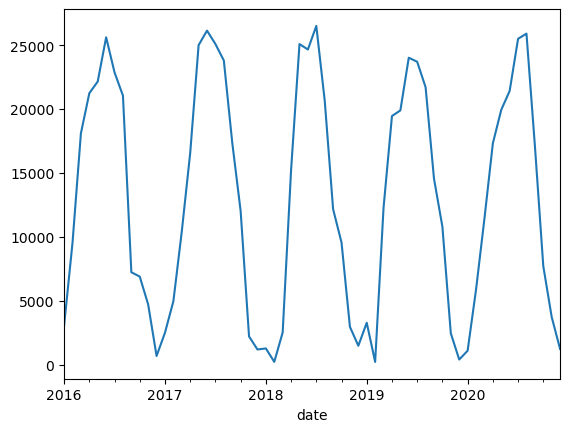

In [13]:
#Extract SLC
SLC = data[data['name'] == 'Southland Leisure Centre'][['date', 'kWh']].reset_index(drop=True)
#Convert SLC to datetime
SLC['date']=pd.to_datetime(SLC['date'])
#Sort
SLC=SLC.sort_values(by='date')
#Group by month
SLC=SLC.groupby(pd.Grouper(key='date',freq='M')).sum()
SLC=SLC.reset_index()
#Cut 2016->2021
start_date=datetime(2016,1,1)
end_date=datetime(2021,1,1)
SLC_filtered = SLC[(SLC['date'] >= start_date) & (SLC['date'] < end_date)].reset_index(drop=True)
SLC= SLC_filtered.set_index('date')['kWh'].squeeze()
print(SLC.head())
print(SLC.tail())
SLC.plot()

In [14]:
SLC.to_csv('SLC.csv')